# COMMON TOOLS FOR DATA SCIENCE

## 读取数据

In [1]:
from data_preprocessing.loader import load_data

df, info = load_data(r'../executable/2025-Project-Data(ESM Table 1).csv')
print(df.head())
print(f"Info: {info}")

          Label           Deposit   SiO2  TiO2  Al2O3  TFe2O3   MnO   MgO  \
0  Au-rich PCDs  Oyu Tolgoi Cu-Au  65.37  0.60  17.98    5.39  0.12  1.53   
1  Au-rich PCDs  Oyu Tolgoi Cu-Au  57.42  0.58  17.77    5.19  0.19  1.48   
2  Au-rich PCDs  Oyu Tolgoi Cu-Au  63.10  0.33  16.61    3.78  0.08  0.73   
3  Au-rich PCDs  Oyu Tolgoi Cu-Au  65.13  0.31  16.21    3.68  0.10  0.79   
4  Au-rich PCDs  Oyu Tolgoi Cu-Au  64.38  0.35  17.36    3.74  0.04  0.82   

    CaO  Na2O  ...    Dy    Ho    Er    Tm    Yb    Lu   Hf    Ta    Th     U  
0  3.89  4.92  ...  3.35  0.63  1.93  0.27  2.00  0.32  3.0  0.40  2.63  1.54  
1  4.52  5.48  ...  3.30  0.70  2.10  0.30  2.10  0.30  3.0  0.50  3.00  1.30  
2  1.96  4.91  ...  1.91  0.40  1.26  0.21  1.54  0.28  2.4  0.34  2.81  1.71  
3  1.97  4.99  ...  1.90  0.40  1.25  0.20  1.46  0.25  2.5  0.34  2.63  1.32  
4  1.60  5.61  ...  2.07  0.43  1.32  0.22  1.59  0.28  2.4  0.30  2.38  1.54  

[5 rows x 36 columns]
Info: CSV 文件 ../executable/2025-Pr

## 设置单位

In [2]:
# 1. 定义单位映射
expected_units = {
    # Major oxides (wt%)
    'SiO2':  'wt%',
    'TiO2':  'wt%',
    'Al2O3':'wt%',
    'TFe2O3':'wt%',
    'MnO':   'wt%',
    'MgO':   'wt%',
    'CaO':   'wt%',
    'Na2O':  'wt%',
    'K2O':   'wt%',
    'P2O5':  'wt%',
    # Trace elements (ppm)
    'Rb':  'ppm',  'Sr':  'ppm',  'Y':   'ppm',  'Zr':  'ppm',
    'Nb':  'ppm',  'Ba':  'ppm',  'La':  'ppm',  'Ce':  'ppm',
    'Pr':  'ppm',  'Nd':  'ppm',  'Sm':  'ppm',  'Eu':  'ppm',
    'Gd':  'ppm',  'Tb':  'ppm',  'Dy':  'ppm',  'Ho':  'ppm',
    'Er':  'ppm',  'Tm':  'ppm',  'Yb':  'ppm',  'Lu':  'ppm',
    'Hf':  'ppm',  'Ta':  'ppm',  'Th':  'ppm',  'U':   'ppm'
}

# 2. 为每一列设置 attrs['unit']
for col, unit in expected_units.items():
    if col in df.columns:
        df[col].attrs['unit'] = unit

# 3. 验证设置是否成功
for col in expected_units:
    if col in df.columns:
        print(f"{col}: unit = {df[col].attrs.get('unit')}")

SiO2: unit = wt%
TiO2: unit = wt%
Al2O3: unit = wt%
TFe2O3: unit = wt%
MnO: unit = wt%
MgO: unit = wt%
CaO: unit = wt%
Na2O: unit = wt%
K2O: unit = wt%
P2O5: unit = wt%
Rb: unit = ppm
Sr: unit = ppm
Y: unit = ppm
Zr: unit = ppm
Nb: unit = ppm
Ba: unit = ppm
La: unit = ppm
Ce: unit = ppm
Pr: unit = ppm
Nd: unit = ppm
Sm: unit = ppm
Eu: unit = ppm
Gd: unit = ppm
Tb: unit = ppm
Dy: unit = ppm
Ho: unit = ppm
Er: unit = ppm
Tm: unit = ppm
Yb: unit = ppm
Lu: unit = ppm
Hf: unit = ppm
Ta: unit = ppm
Th: unit = ppm
U: unit = ppm


## 数据校验

In [3]:
from data_preprocessing.validator import verify_dtype

valid, error_location, info = verify_dtype(df, {"SiO2": "float64",})

print(f"Schema valid: {valid}")
print(f"Error location: {error_location}")
print(f"Info: {info}")

Schema valid: True
Error location: {}
Info: 所有列 dtype 与预期一致


In [4]:
from data_preprocessing.validator import verify_units

valid, error_location, info = verify_units(df, {"SiO2": 'wt%',})

print(f"Schema valid: {valid}")
print(f"Error location: {error_location}")
print(f"Info: {info}")

Schema valid: True
Error location: {}
Info: 所有列 unit 与预期一致


## 缺失值处理

In [5]:
from data_preprocessing.validator import handle_missing_values

df_miss, info = handle_missing_values(df, method='zero')

print(f"Missing values handled: {df_miss.isnull().sum()}")
print(f"Info: {info}")

Missing values handled: Label      0
Deposit    0
SiO2       0
TiO2       0
Al2O3      0
TFe2O3     0
MnO        0
MgO        0
CaO        0
Na2O       0
K2O        0
P2O5       0
Rb         0
Sr         0
Y          0
Zr         0
Nb         0
Ba         0
La         0
Ce         0
Pr         0
Nd         0
Sm         0
Eu         0
Gd         0
Tb         0
Dy         0
Ho         0
Er         0
Tm         0
Yb         0
Lu         0
Hf         0
Ta         0
Th         0
U          0
dtype: int64
Info: 缺失值处理完成，使用方法: zero


## CLR 变换

In [6]:
from data_preprocessing.transform import clr_transform

df_clr, info = clr_transform(df, ["SiO2", "TiO2", "Al2O3", "TFe2O3", "MnO", "MgO", "CaO", "Na2O", "K2O", "P2O5"])
print(f"CLR transformed data: {df_clr.head()}")
print(f"Info: {info}")

CLR transformed data:           Label           Deposit  clr_SiO2  clr_TiO2  clr_Al2O3  clr_TFe2O3  \
0  Au-rich PCDs  Oyu Tolgoi Cu-Au  0.016901  0.339762   0.111819    0.373189   
1  Au-rich PCDs  Oyu Tolgoi Cu-Au -0.112769  0.305860   0.100071    0.335377   
2  Au-rich PCDs  Oyu Tolgoi Cu-Au -0.018441 -0.258075   0.032564    0.018368   
3  Au-rich PCDs  Oyu Tolgoi Cu-Au  0.013223 -0.320596   0.008188   -0.008444   
4  Au-rich PCDs  Oyu Tolgoi Cu-Au  0.001641 -0.199235   0.076728    0.007729   

    clr_MnO   clr_MgO   clr_CaO  clr_Na2O   clr_K2O  clr_P2O5  
0  0.912696  0.045828  0.221817  0.269416  0.284446  0.413971  
1  1.372228  0.012602  0.371920  0.377213  0.284446  0.531754  
2  0.507230 -0.694151 -0.463648  0.267382  0.519657 -0.199133  
3  0.730374 -0.615162 -0.458559  0.283544  0.355354 -0.279176  
4 -0.185917 -0.577891 -0.666589  0.400659  0.473137 -0.279176  
Info: CLR 变换完成


## 异常值标记

In [7]:
from data_preprocessing.validator import flag_outliers

df_proc, info = flag_outliers(df_clr, z_thresh=3.0)
# 找出所有 outlier 列名
outlier_cols = [c for c in df_proc.columns if c.startswith('outlier_')]
# 如果任意一列为 True，就保留该行
mask = df_proc[outlier_cols].any(axis=1)
# 应用掩码
outliers = df_proc[mask]
print(f"Outliers flagged: {outliers}")
# 符合条件的行数
print(f"Number of outliers: {len(outliers)}")
print(f"Info: {info}")

Outliers flagged:             Label                       Deposit  clr_SiO2  clr_TiO2  \
7    Au-rich PCDs                 Almalyk Cu-Au  0.080321 -0.921369   
16   Au-rich PCDs                 Almalyk Cu-Au -0.117308  0.157440   
17   Au-rich PCDs                 Almalyk Cu-Au  0.082902 -0.663540   
60   Au-rich PCDs                  Pulang Cu-Au  0.062211  0.177243   
89   Au-rich PCDs               Bozshakol Cu-Au  0.157255 -0.458746   
104  Au-rich PCDs         Schaft Creek Cu-Mo-Au  0.038541 -0.228222   
110  Au-rich PCDs  Duobaoshan-Tongshan Cu-Au-Mo  0.106396 -0.921369   
114  Au-rich PCDs  Duobaoshan-Tongshan Cu-Au-Mo  0.083761 -0.864211   
121  Au-rich PCDs  Duobaoshan-Tongshan Cu-Au-Mo  0.068768 -0.619089   
123  Au-rich PCDs  Duobaoshan-Tongshan Cu-Au-Mo  0.044809 -0.576529   
124  Au-rich PCDs  Duobaoshan-Tongshan Cu-Au-Mo  0.041232 -0.535707   
129  Au-rich PCDs                  Koksai Cu-Au  0.098672  0.029607   
141  Au-rich PCDs              Xiongcun I Cu-Au  0.060894 -

## 可视化

In [8]:
from visualization.plot import (
    plot_scatter_matrix,
    plot_correlation_heatmap,
    plot_pca_biplot,
    plot_ratio_diagrams
)

# 选择要可视化的 10 个元素
elements = ['SiO2','TiO2','Al2O3','TFe2O3','MnO','MgO','CaO','Na2O','K2O','P2O5']

# 1. Pair-wise Scatter-Matrix
fig1 = plot_scatter_matrix(df_clr, elements, label_col='Label')
fig1.savefig("../result/fig1_scatter_matrix.png", dpi=300, bbox_inches='tight')

# 2. Correlation Heat-map (Pearson & Spearman)
fig2 = plot_correlation_heatmap(df_clr, elements, method='pearson')
fig2.savefig("../result/fig2_heatmap_pearson.png", dpi=300, bbox_inches='tight')

fig3 = plot_correlation_heatmap(df_clr, elements, method='spearman')
fig3.savefig("../result/fig3_heatmap_spearman.png", dpi=300, bbox_inches='tight')

# 3. PCA Bi-plot (PC1 vs PC2)
fig4 = plot_pca_biplot(df_clr, elements, label_col='Label')
fig4.savefig("../result/fig4_pca_biplot.png", dpi=300, bbox_inches='tight')

# 4. Geochemical Ratio Diagrams
ratios = [('K2O','Na2O'), ('Sr','Y')]
fig5 = plot_ratio_diagrams(df, ratios, against='SiO2')
fig5.savefig("../result/fig5_ratio_diagrams.png", dpi=300, bbox_inches='tight')

## 单位统一

In [9]:
from data_preprocessing.transform import harmonise_units

# 把所有 unit='wt%' 的列统一转换为 ppm
df_ppm, info = harmonise_units(df, target_unit='ppm')

print(info)
# 查看转换后的单位属性
for col in df_ppm.columns:
    unit = df_ppm[col].attrs.get('unit', None)
    if unit == 'ppm':
        print(f"Info: {col} now in {unit}")

所有单位均同一至 ppm


## 对数变化

In [10]:
from data_preprocessing.transform import log_transform

df_log, linfo = log_transform(df_ppm, cols=['SiO2', 'Rb'], base=10)
print(linfo)
print(df_log)

对数变换完成
     log_SiO2    log_Rb
0    1.815378  1.808211
1    1.759063  1.767898
2    1.800029  1.838849
3    1.813781  1.778151
4    1.808751  1.845098
..        ...       ...
440  1.798374  0.799341
441  1.801061  0.908485
442  1.805501  0.602060
443  1.808953  0.505150
444  1.813581  1.220108

[445 rows x 2 columns]


In [11]:
# 去除异常值
df_finial = df_proc[~mask]
df_finial = df_finial.drop(columns=outlier_cols)

# Random Forest
对CLR变换后和未变化的结果，同时进行随机森林分类（使用相同的树数量），并对比结果

结果表明随机森林分类似乎对数据的对数变换不敏感。

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=3, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('CLR 清理后的分类结果：\n', classification_report(y_test, y_pred))

X = df.drop(['Label', 'Deposit'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=3, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('CLR 未清理的分类结果：\n', classification_report(y_test, y_pred))

CLR 清理后的分类结果：
               precision    recall  f1-score   support

Au-rich PCDs       0.74      0.71      0.73        28
Cu-rich PCDs       0.85      0.87      0.86        54

    accuracy                           0.82        82
   macro avg       0.80      0.79      0.79        82
weighted avg       0.82      0.82      0.82        82

CLR 未清理的分类结果：
               precision    recall  f1-score   support

Au-rich PCDs       0.84      0.90      0.87        29
Cu-rich PCDs       0.95      0.92      0.93        60

    accuracy                           0.91        89
   macro avg       0.89      0.91      0.90        89
weighted avg       0.91      0.91      0.91        89



确定最佳树的数量，树越多，模型越稳定，但计算成本越高。此外树太少可能欠拟合，太多可能过拟合，影响模型性能。

根据验证误差曲线选择38颗树最合适，此时训练集和验证集的误差都不再显著下降，同时防止过拟合，是合理的选择。

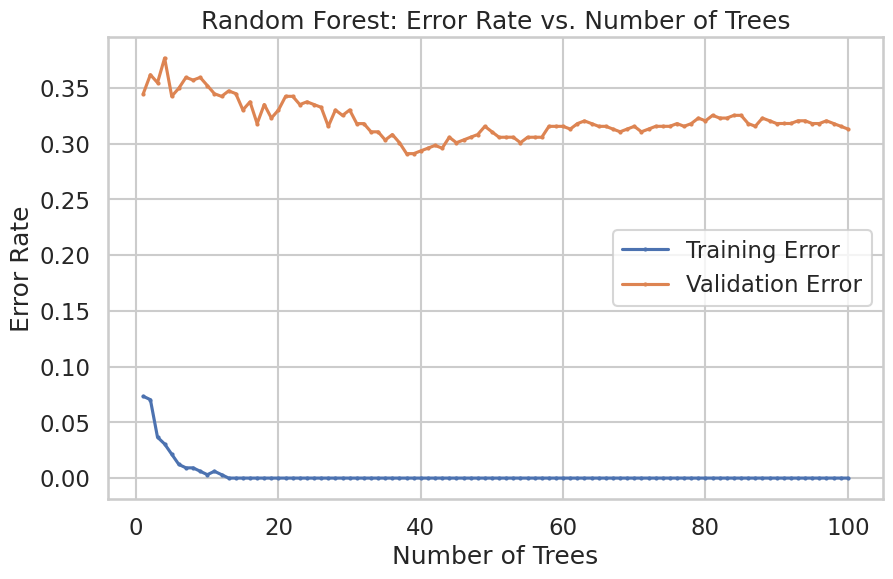

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# 定义要测试的树的数量范围
n_trees = range(1, 101, 1)

# 存储训练和验证分数
train_scores = []
val_scores = []

X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 对每个树的数量进行测试
for n in n_trees:
    # 创建随机森林分类器
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    # 输出训练集错误率
    train_pred = rf.predict(X_train)
    train_score = accuracy_score(y_train, train_pred)
    train_scores.append(1 - train_score)  # 转换为误差
    
    # 使用交叉验证计算验证分数
    val_score = cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean()
    val_scores.append(1 - val_score)  # 转换为误差

# 绘制误差曲线
plt.figure(figsize=(10, 6))
plt.plot(n_trees, train_scores, label='Training Error', marker='o', markersize=2)
plt.plot(n_trees, val_scores, label='Validation Error', marker='o', markersize=2)
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Random Forest: Error Rate vs. Number of Trees')
plt.legend()
plt.grid(True)

In [14]:
rf = RandomForestClassifier(n_estimators=38, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf.fit(X_train, y_train)

# 保存模型
import joblib
joblib.dump(rf, '../result/rf_model.pkl')

['../result/rf_model.pkl']

保存的最好模型:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.96      0.89      0.92        54

    accuracy                           0.90        82
   macro avg       0.89      0.91      0.89        82
weighted avg       0.91      0.90      0.90        82



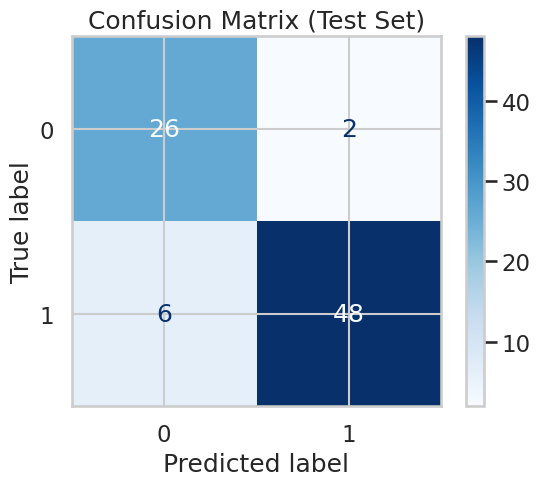

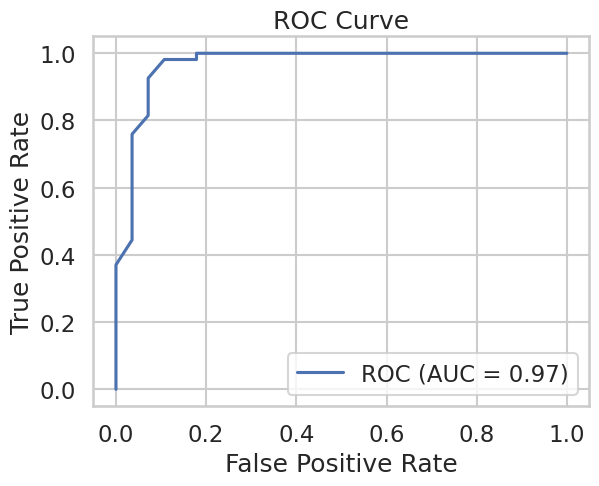

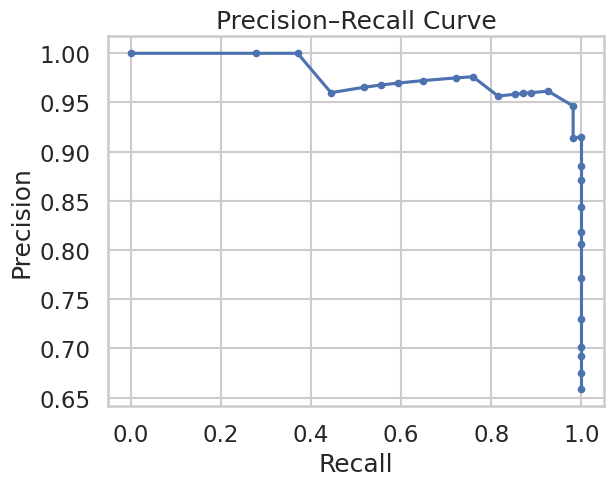

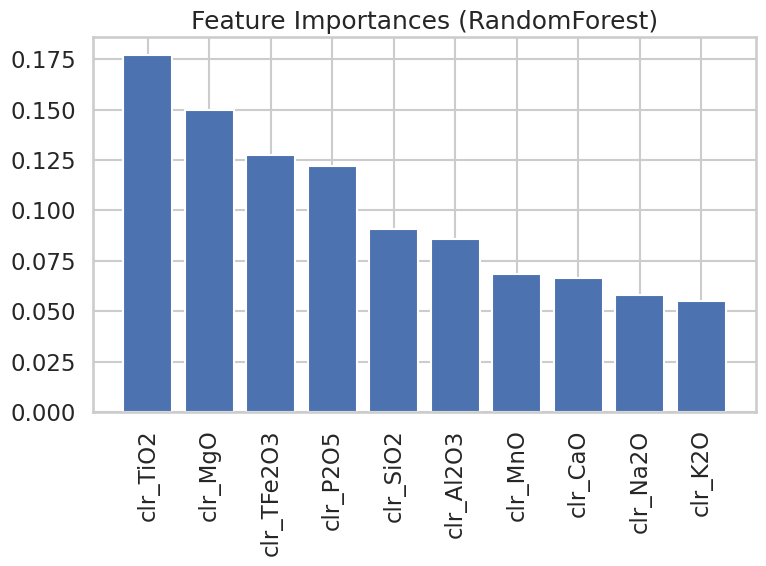

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

# 加载并推理模型
rf_loaded = joblib.load('../result/rf_model.pkl')

X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = rf_loaded.predict(X_test)
# Au-rich PCDs 为 0，Au-poor PCDs 为 1
y_pred = np.where(y_pred == "Au-rich PCDs", 0, 1)
y_test = np.where(y_test == "Au-rich PCDs", 0, 1)
print('保存的最好模型:\n', classification_report(y_test, y_pred))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# 2. ROC Curve & AUC
y_score = rf_loaded.predict_proba(X_test)  # 概率预测
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Precision–Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:, 1], pos_label=1)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

# 4. Feature Importance Bar Chart (RandomForestClassifier)
# 在加载好的模型中获取特征名称与重要度
importances = rf_loaded.feature_importances_
feature_names = list(X.columns)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

# Xgboost

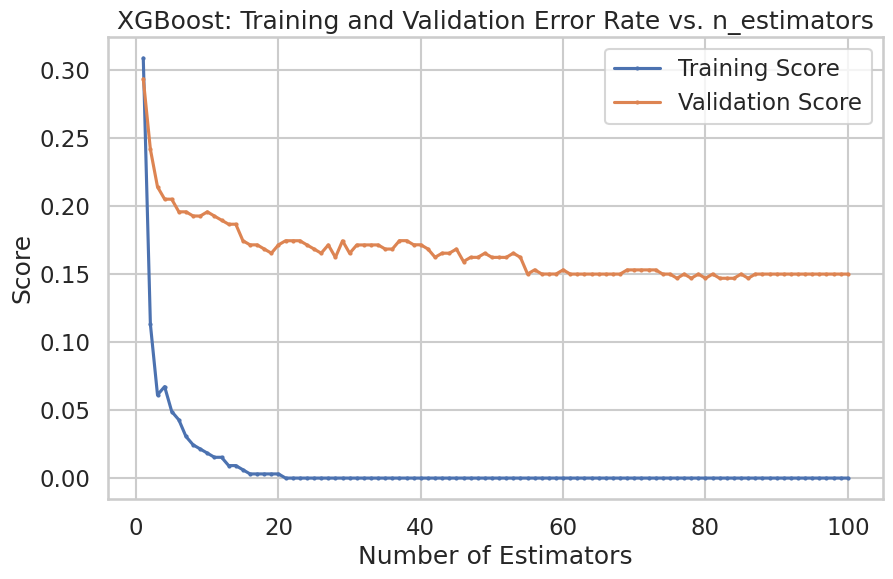

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

n_estimators_range = range(1, 101, 1)
train_scores = []
val_scores = []

X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

for n in n_estimators_range:
    model = XGBClassifier(eval_metric='mlogloss', random_state=0, n_estimators=n)
    model.fit(X_train, y_train)
    
    # 训练集评分
    train_score = model.score(X_train, y_train)
    train_scores.append(1 - train_score)
    
    # 验证评分（使用交叉验证）
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    val_scores.append(1 - cv_score)

# 绘制结果
plt.figure(figsize=(10,6))
plt.plot(n_estimators_range, train_scores, label='Training Score', marker='o', markersize=2)
plt.plot(n_estimators_range, val_scores, label='Validation Score', marker='o', markersize=2)
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('XGBoost: Training and Validation Error Rate vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

显然，当n=30左右时，训练集和验证集的误差都不再显著下降，模型的性能也不再提升。此时，是最佳参数。

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=0, n_estimators=30)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

# 保存模型
import joblib
joblib.dump(xgb, '../result/xgb_model.pkl')

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.89      0.93      0.91        54

    accuracy                           0.88        82
   macro avg       0.87      0.86      0.86        82
weighted avg       0.88      0.88      0.88        82



['../result/xgb_model.pkl']

保存的最好模型:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.89      0.93      0.91        54

    accuracy                           0.88        82
   macro avg       0.87      0.86      0.86        82
weighted avg       0.88      0.88      0.88        82



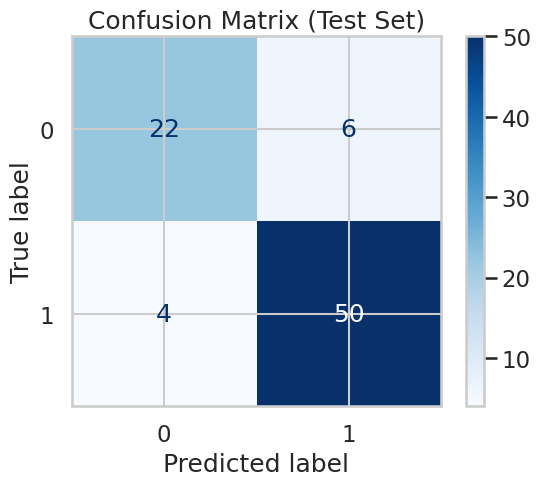

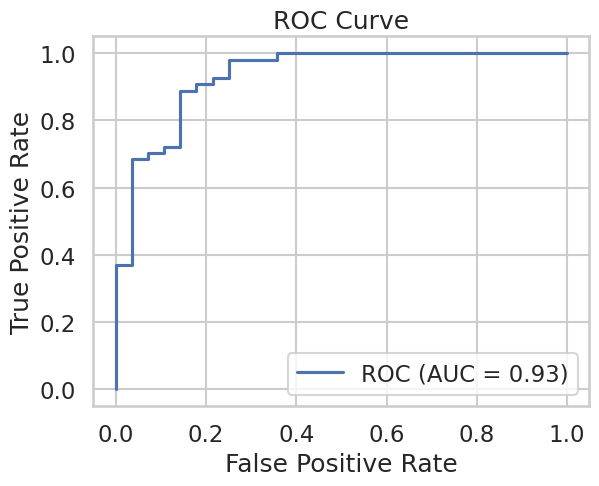

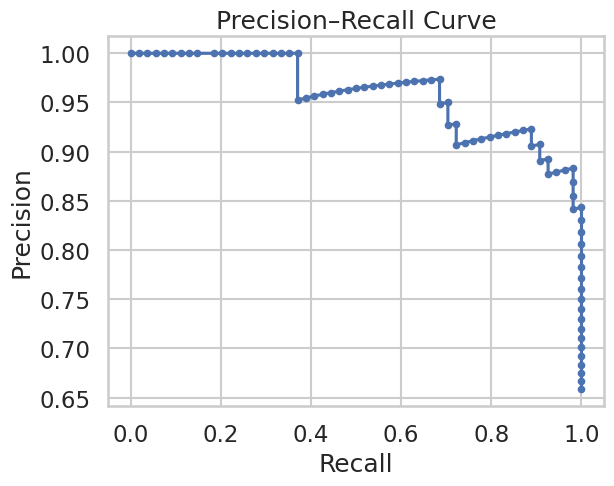

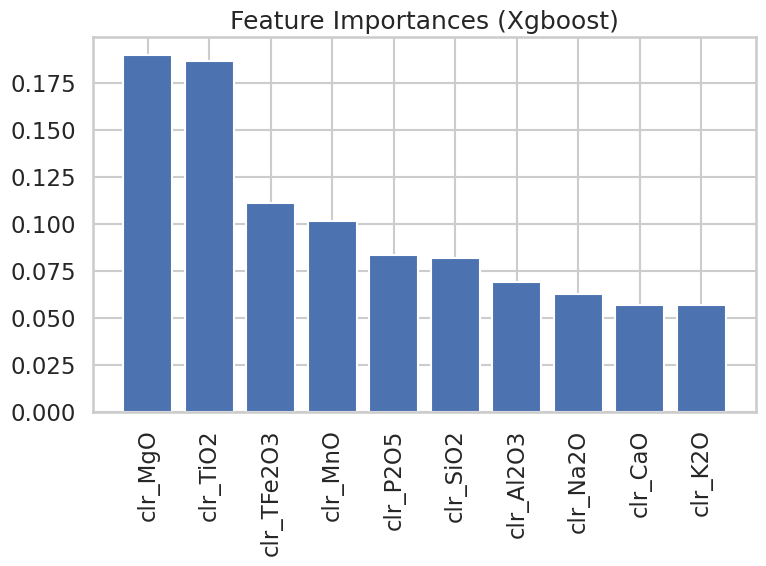

In [18]:
# 加载模型
import joblib
xgb_loaded = joblib.load('../result/xgb_model.pkl')
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)
y_pred = xgb_loaded.predict(X_test)
print('保存的最好模型:\n', classification_report(y_test, y_pred))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# 2. ROC Curve & AUC
y_score = xgb_loaded.predict_proba(X_test)  # 概率预测
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Precision–Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:, 1], pos_label=1)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

# 4. Feature Importance Bar Chart (RandomForestClassifier)
# 在加载好的模型中获取特征名称与重要度
importances = xgb_loaded.feature_importances_
feature_names = list(X.columns)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importances (Xgboost)")
plt.tight_layout()
plt.show()

# SVM模型

In [21]:
from modeling.svm_classifier import train_svm_classifier, classification_report

X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']

SVM_model, SVM_results = train_svm_classifier(X, y, test_size=0.5, random_state=2)
print(f"SVM classifier: {SVM_model}")
print(SVM_results["classification_report"])

# 保存模型
import joblib
joblib.dump(SVM_model, '../result/svm_model.pkl')

# import seaborn as sns
# plt.figure(figsize=(8, 6))
# confusion_matrix = SVM_results["confusion_matrix"]
# # 将混淆矩阵转换为百分比
# confusion_matrix_percent = confusion_matrix / confusion_matrix.sum(axis=1).reshape(-1, 1)
# sns.heatmap(confusion_matrix_percent, annot=True, fmt='.2', cmap='Blues', xticklabels=["Au", "Cu"], yticklabels=["Au", "Cu"])

SVM classifier: SVC(C=10, probability=True)
              precision    recall  f1-score   support

Au-rich PCDs       0.86      0.79      0.83        63
Cu-rich PCDs       0.91      0.94      0.93       142

    accuracy                           0.90       205
   macro avg       0.89      0.87      0.88       205
weighted avg       0.90      0.90      0.90       205



['../result/svm_model.pkl']

保存的最好模型:
               precision    recall  f1-score   support

Au-rich PCDs       0.75      0.75      0.75        28
Cu-rich PCDs       0.87      0.87      0.87        54

    accuracy                           0.83        82
   macro avg       0.81      0.81      0.81        82
weighted avg       0.83      0.83      0.83        82



/home/sethome/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


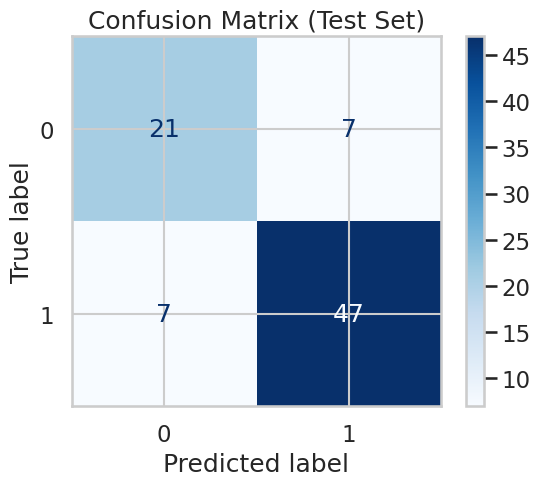

/home/sethome/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


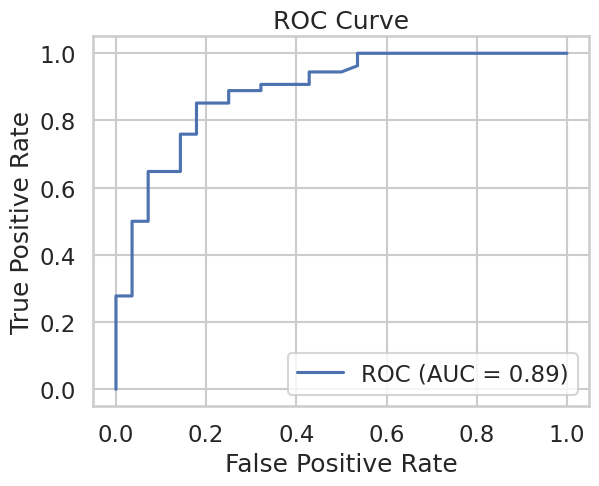

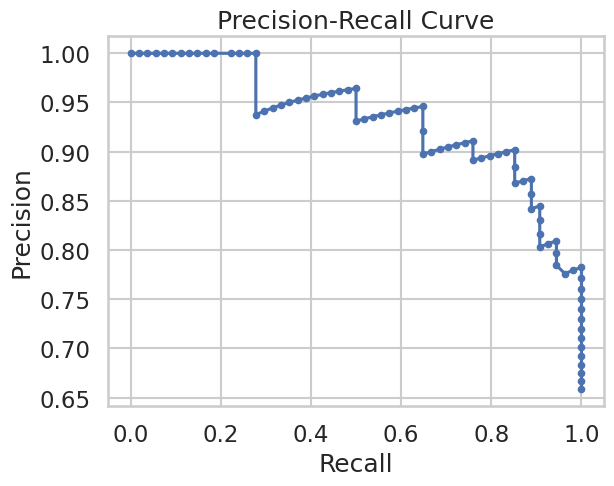

In [23]:
# 加载模型
svm_model = joblib.load('../result/svm_model.pkl')
X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = svm_model.predict(X_test)
print('保存的最好模型:\n', classification_report(y_test, y_pred))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# 2. ROC Curve & AUC
y_score = svm_model.predict_proba(X_test)  # 概率预测
y_test = np.where(y_test == "Au-rich PCDs", 0, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Precision–Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:, 1], pos_label=1)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

## BP网络二分类

Epoch 1/1000


/home/sethome/miniconda3/envs/data/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5242 - loss: 0.6894 - val_accuracy: 0.7424 - val_loss: 0.6369 - learning_rate: 0.0010
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7195 - loss: 0.6478 - val_accuracy: 0.6970 - val_loss: 0.6032 - learning_rate: 0.0010
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7012 - loss: 0.6180 - val_accuracy: 0.6818 - val_loss: 0.5790 - learning_rate: 0.0010
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6982 - loss: 0.5954 - val_accuracy: 0.6818 - val_loss: 0.5600 - learning_rate: 0.0010
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7041 - loss: 0.5814 - val_accuracy: 0.6818 - val_loss: 0.5461 - learning_rate: 0.0010
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7226 - loss: 0.5569 - val_accuracy: 0.6818 - val_loss: 0.5368 - learning_rate: 0.0010
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7109 - loss: 0.5540 - val_accuracy: 0.6970

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8298 - loss: 0.3852 - val_accuracy: 0.8030 - val_loss: 0.4093 - learning_rate: 0.0010
Epoch 35/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8103 - loss: 0.3984 - val_accuracy: 0.8333 - val_loss: 0.4025 - learning_rate: 0.0010
Epoch 36/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8259 - loss: 0.3806 - val_accuracy: 0.8333 - val_loss: 0.3975 - learning_rate: 0.0010
Epoch 37/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8250 - loss: 0.3769 - val_accuracy: 0.8182 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 38/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8259 - loss: 0.3697 - val_accuracy: 0.8030 - val_loss: 0.3947 - learning_rate: 0.0010
Epoch 39/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8637 - loss: 0.3618 - val_accuracy: 0.8030 - val_loss: 0.3974 - learning_rate: 0.0010
Epoch 40/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8394 - loss: 0.3700 - val_accuracy: 

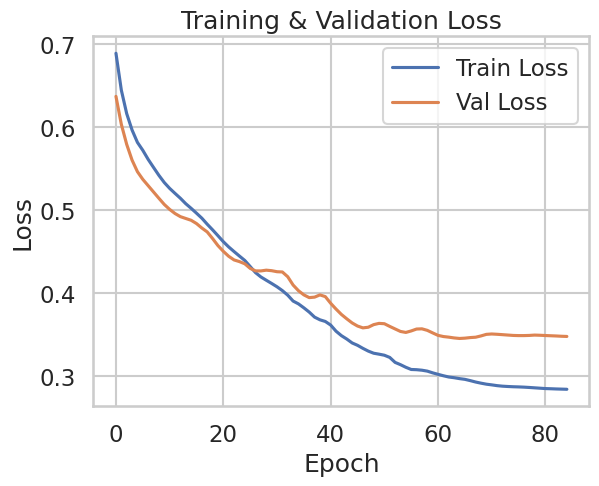

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


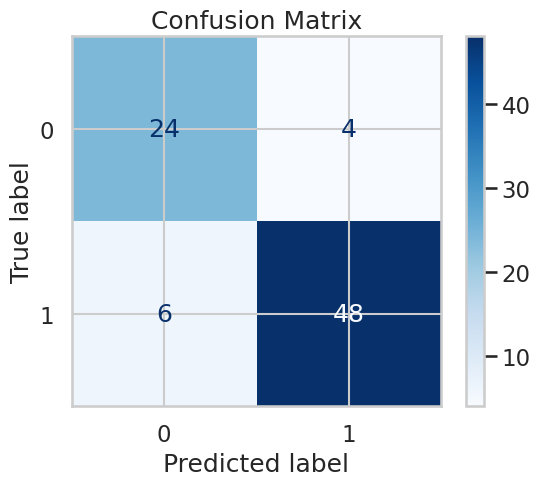

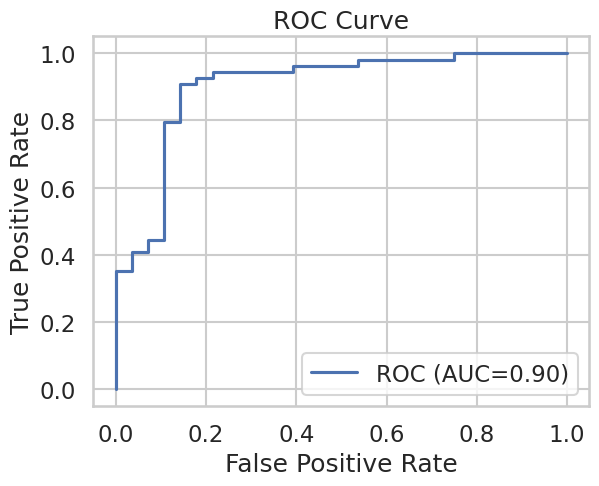

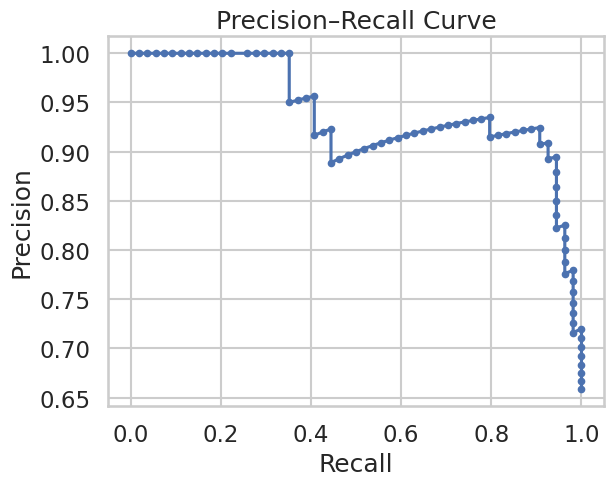

In [42]:
# 利用Keras构建深度学习模型 进行二分类 同时输出 混淆矩阵 ROC曲线 精确率-召回率曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

X = df_finial.drop(['Label', 'Deposit'], axis=1)
y = df_finial['Label']

y = np.where(y == "Au-rich PCDs", 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 二分类模型构建 二层BP
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # 显式使用 Input
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))  # 输出维度=1, 激活函数sigmoid
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]
# 训练模型
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_split=0.2, verbose=1, callbacks=callbacks)

import joblib
joblib.dump(model, '../result/dl_model.pkl')

# 绘制 Loss 曲线
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

# 预测
y_pred_prob = model.predict(X_test).ravel()  # 预测概率
y_pred = (y_pred_prob > 0.5).astype(int)

# 1. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 3. Precision–Recall 曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob, pos_label=1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.show()
